In [1]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
import easyocr

In [5]:
img = cv2.imread('test.jpg')

In [6]:
img = cv2.imread("/kaggle/input/car-data/Cars1.png")

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

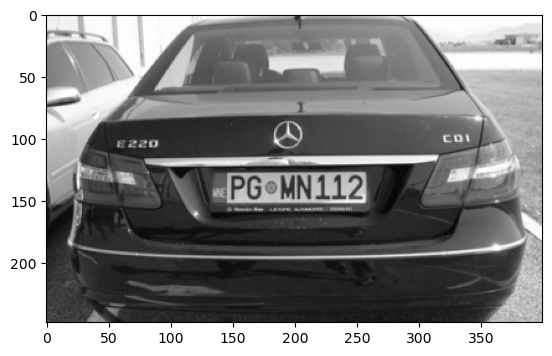

In [8]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [9]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [10]:
edged = cv2.Canny(bfilter, 30, 200)

In [11]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=0cd86d9fc45a6de018a43e425613bf9caa485daaf68e5a1ae14845fab6b9bf9b
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [12]:
import imutils

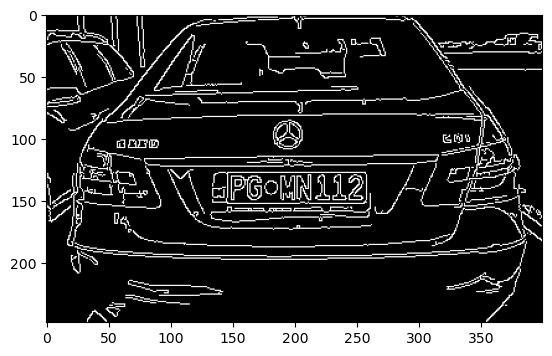

In [13]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [14]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
contours = imutils.grab_contours(keypoints)

In [16]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [17]:
location = None
for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [18]:
mask = np.zeros(gray.shape, np.uint8)

In [19]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

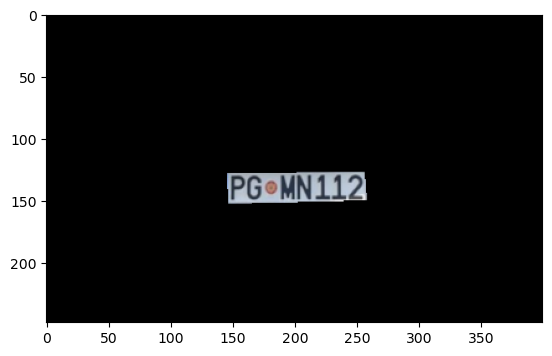

In [20]:
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

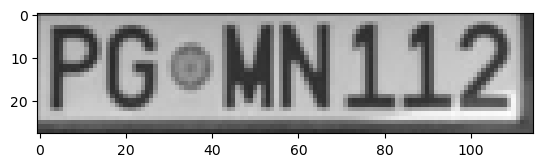

In [21]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [22]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

[([[0, 0], [115, 0], [115, 28], [0, 28]], 'PGoNN112', 0.31129162360505624)]


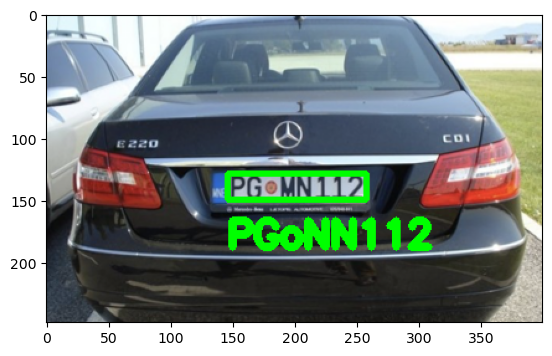

In [23]:
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))